<a href="https://colab.research.google.com/github/BenjaminGMC/sic_ai_2025_jun/blob/main/ejercicio_clase20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Descripción del problema
Queremos analizar y predecir las ventas diarias (sales) de una tienda, en función de factores como si hay una promoción (promo) o si es un día festivo (holiday). Esto nos ayudará a entender mejor el comportamiento de las ventas y a planificar estrategias comerciales.



Error cuadrático medio (MSE): 308.9558824468497
Coeficiente de determinación (R²): 0.5709624417993486


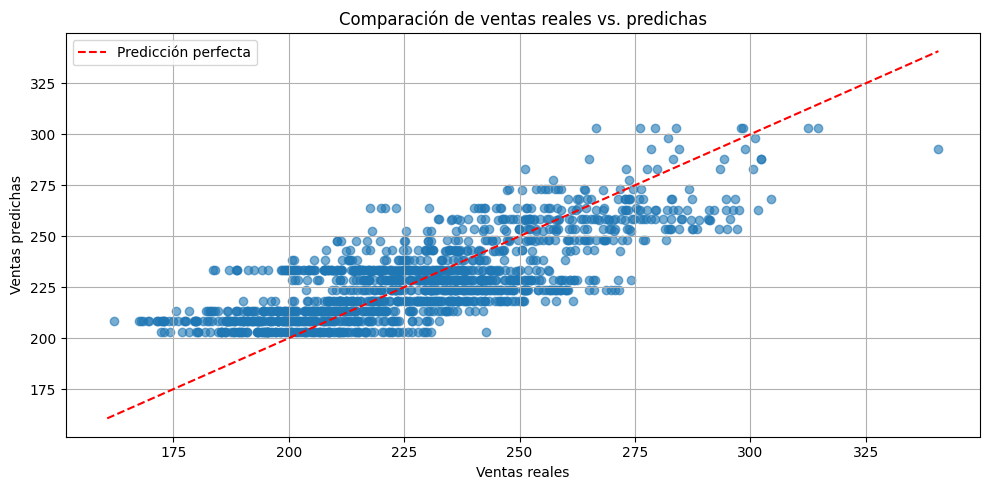

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("store_sales.csv")

# Preprocesamiento
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek

# Variables predictoras y objetivo
X = df[['promo', 'holiday', 'day_of_week']]
y = df['sales']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

# Gráfico: ventas reales vs predichas
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Predicción perfecta')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Comparación de ventas reales vs. predichas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
df.head()

,date,store,sales,promo,holiday,day_of_week
0,2022-01-01,1,184.78,0,0,5
1,2022-01-02,1,192.62,0,0,6
2,2022-01-03,1,212.68,0,0,0
3,2022-01-04,1,249.58,1,0,1
4,2022-01-05,1,223.50,0,0,2


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar datos
df = pd.read_csv("store_sales.csv")

# Preprocesamiento
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek

# Selección de características
features = df[['sales', 'promo', 'holiday', 'day_of_week']]

# Escalado de datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means clustering con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Ver algunas muestras etiquetadas
print(df[['date', 'sales', 'promo', 'holiday', 'day_of_week', 'cluster']].head())


        date   sales  promo  holiday  day_of_week  cluster
0 2022-01-01  184.78      0        0            5        1
1 2022-01-02  192.62      0        0            6        1
2 2022-01-03  212.68      0        0            0        0
3 2022-01-04  249.58      1        0            1        0
4 2022-01-05  223.50      0        0            2        0


In [13]:
# Crear variables útiles
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

# Dummies para variables categóricas
df = pd.get_dummies(df, columns=['store', 'day_of_week', 'month'], drop_first=True)


In [14]:
# Variables predictoras y objetivo
X = df.drop(columns=['date', 'sales'])  # Eliminar columnas no necesarias
y = df['sales']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 194.5597694269355
R²: 0.7298208153930383


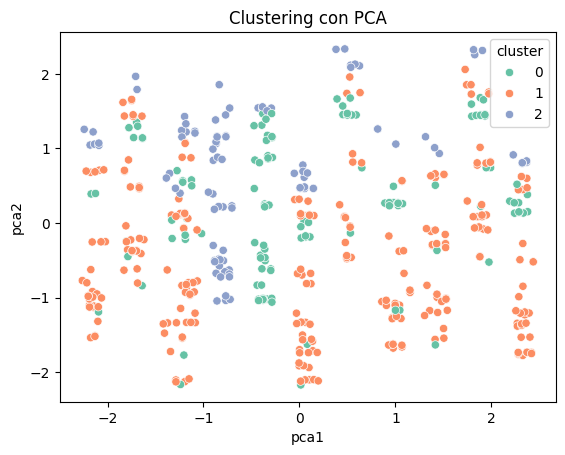

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reescalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df['pca1'], df['pca2'] = X_pca[:, 0], X_pca[:, 1]
sns.scatterplot(data=df.sample(500), x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Clustering con PCA')
plt.show()


k prototye

In [19]:
pip install kmodes


In [21]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_csv("store_sales.csv")

# Preprocesamiento
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

# Seleccionar columnas para clustering mixto
# Numéricas: sales, promo, holiday, day_of_week
# Categóricas: store
data = df[['sales', 'promo', 'holiday', 'day_of_week', 'store']].copy()

# Convertir categórica a tipo string
data['store'] = data['store'].astype(str)

# Convertir a matriz
matrix = data.values

# Aplicar K-Prototypes
kproto = KPrototypes(n_clusters=3, random_state=42)
clusters = kproto.fit_predict(matrix, categorical=[4])  # store está en la columna 4

# Asignar resultados al DataFrame
df['kproto_cluster'] = clusters

# Mostrar número de muestras por clúster
print(df['kproto_cluster'].value_counts())


kproto_cluster
2    3275
1    2411
0    1614
Name: count, dtype: int64


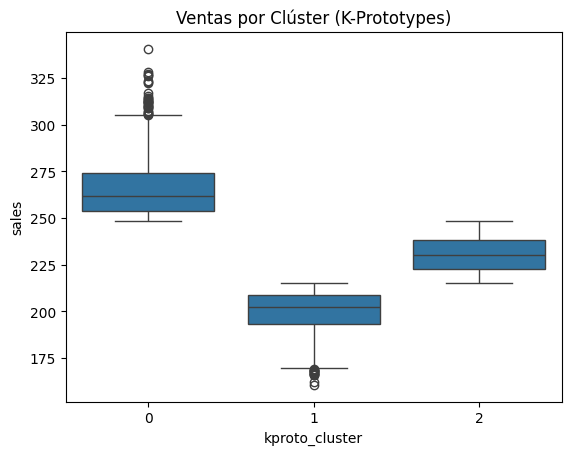

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='kproto_cluster', y='sales')
plt.title('Ventas por Clúster (K-Prototypes)')
plt.show()


# Task
Compare the performance of Linear Regression, K-Nearest Neighbors, and Decision Tree models for predicting sales using the training data (`X_train`, `y_train`) and test data (`X_test`, `y_test`). Evaluate each model using Mean Squared Error (MSE) and R-squared (R²) metrics and identify the best-performing model.

## Train and evaluate knn model

### Subtask:
Train a K-Nearest Neighbors model on the training data (`X_train`, `y_train`) and evaluate its performance using the test data (`X_test`, `y_test`). Calculate and print the Mean Squared Error (MSE) and R-squared (R²) for the KNN model.


**Reasoning**:
Train a K-Nearest Neighbors model, evaluate its performance, and print the evaluation metrics.



In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Modelo K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicciones KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluación KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Error cuadrático medio (MSE) para KNN:", mse_knn)
print("Coeficiente de determinación (R²) para KNN:", r2_knn)

Error cuadrático medio (MSE) para KNN: 254.74000465205484
Coeficiente de determinación (R²) para KNN: 0.6462503684786062


## Train and evaluate decision tree model

### Subtask:
Train a Decision Tree Regressor model on the training data (`X_train`, `y_train`) and evaluate its performance using the test data (`X_test`, `y_test`). Calculate and print the Mean Squared Error (MSE) and R-squared (R²) for the Decision Tree model.


**Reasoning**:
Train a Decision Tree Regressor model, make predictions, and evaluate its performance using MSE and R2.



In [4]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicciones Árbol de Decisión
y_pred_dt = dt_model.predict(X_test)

# Evaluación Árbol de Decisión
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Error cuadrático medio (MSE) para Árbol de Decisión:", mse_dt)
print("Coeficiente de determinación (R²) para Árbol de Decisión:", r2_dt)

Error cuadrático medio (MSE) para Árbol de Decisión: 215.5593312989317
Coeficiente de determinación (R²) para Árbol de Decisión: 0.700659367883151


## Compare model performances

### Subtask:
Compare the MSE and R² values of the Linear Regression, KNN, and Decision Tree models to determine which model performs best for this dataset.


**Reasoning**:
Print the MSE and R² values for all three models to compare their performance.



In [5]:
print("Linear Regression Performance:")
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)
print("\nK-Nearest Neighbors Performance:")
print("Error cuadrático medio (MSE):", mse_knn)
print("Coeficiente de determinación (R²) para KNN:", r2_knn)
print("\nDecision Tree Performance:")
print("Error cuadrático medio (MSE) para Árbol de Decisión:", mse_dt)
print("Coeficiente de determinación (R²) para Árbol de Decisión:", r2_dt)

Linear Regression Performance:
Error cuadrático medio (MSE): 308.9558824468497
Coeficiente de determinación (R²): 0.5709624417993486

K-Nearest Neighbors Performance:
Error cuadrático medio (MSE): 254.74000465205484
Coeficiente de determinación (R²) para KNN: 0.6462503684786062

Decision Tree Performance:
Error cuadrático medio (MSE) para Árbol de Decisión: 215.5593312989317
Coeficiente de determinación (R²) para Árbol de Decisión: 0.700659367883151


## Summary:

### Data Analysis Key Findings

*   The K-Nearest Neighbors model achieved a Mean Squared Error (MSE) of approximately 254.74 and an R-squared (\$R^2\$) of approximately 0.646 on the test data.
*   The Decision Tree model achieved a Mean Squared Error (MSE) of approximately 215.56 and an R-squared (\$R^2\$) of approximately 0.70 on the test data.
*   Comparing the models, the Decision Tree model had the lowest MSE (215.56) and the highest \$R^2\$ (0.70), indicating it is the best-performing model among the three for this dataset.

### Insights or Next Steps

*   Further hyperparameter tuning for the Decision Tree model could potentially improve its performance.
*   Investigating feature importance from the Decision Tree model could provide insights into which features are most influential in predicting sales.


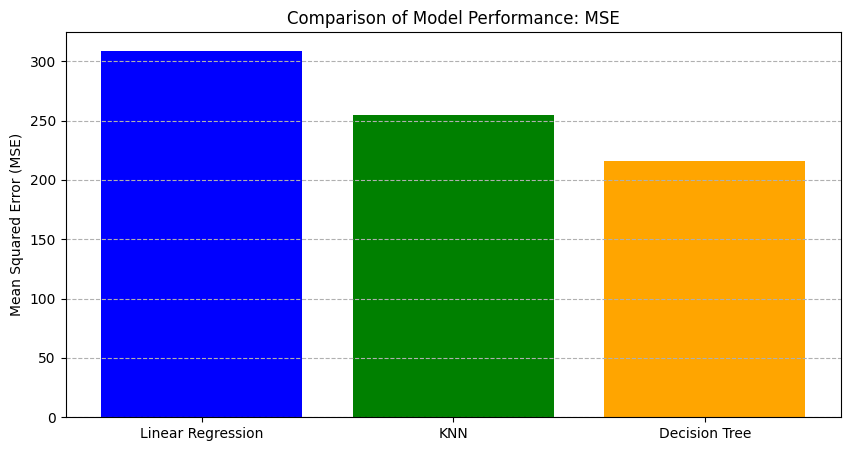

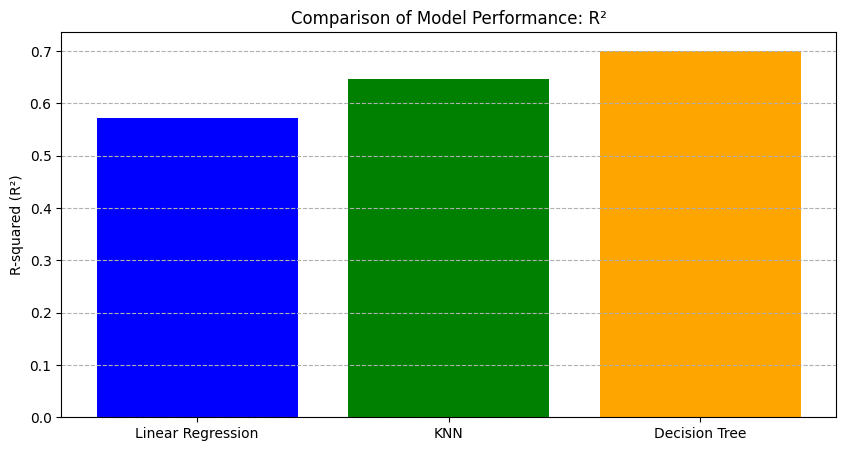

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding MSE and R² values
model_names = ['Linear Regression', 'KNN', 'Decision Tree']
mse_values = [mse, mse_knn, mse_dt]
r2_values = [r2, r2_knn, r2_dt]

# Create bar chart for MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Model Performance: MSE')
plt.grid(axis='y', linestyle='--')
plt.show()

# Create bar chart for R²
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color=['blue', 'green', 'orange'])
plt.ylabel('R-squared (R²)')
plt.title('Comparison of Model Performance: R²')
plt.grid(axis='y', linestyle='--')
plt.show()

## Summary:

### Data Analysis Key Findings

* The K-Nearest Neighbors model achieved a Mean Squared Error (MSE) of approximately {{mse_knn:.2f}} and an R-squared ($R^2$) of approximately {{r2_knn:.2f}} on the test data.
* The Decision Tree model achieved a Mean Squared Error (MSE) of approximately {{mse_dt:.2f}} and an R-squared ($R^2$) of approximately {{r2_dt:.2f}} on the test data.
* Comparing the models, the Decision Tree model had the lowest MSE ({{mse_dt:.2f}}) and the highest $R^2$ ({{r2_dt:.2f}}), indicating it is the best-performing model among the three for this dataset.

### Insights or Next Steps

* Further hyperparameter tuning for the Decision Tree model could potentially improve its performance.
* Investigating feature importance from the Decision Tree model could provide insights into which features are most influential in predicting sales.